In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Linear Regression Model

Standard linear regression model은 다음과 같습니다.

$$ f(\mathbf{x}) = \mathbf{x}^T \mathbf{w} $$

Bias weight (intercept) 는 $ \mathbf{x} $ 에 element 1을 추가함으로서 포함될수 있습니다. <br>
여기서 observed value $ y $ 와 $ f(\mathbf{x}) $ 는 additive noise $ \epsilon $ 많큼 다르다고 가정합니다.<br>

$$ y = f(\mathbf{x}) + \epsilon $$


또한 해당 noise $ \epsilon $ 는 mean 0 그리고 variance $ \sigma^2_n $ 를 갖은 i.i.d. (identically independent distributed) gaussian distribution을 따른다고 가정합니다.

$$ \epsilon \sim \mathscr{N}(0, \sigma^2_n) $$








PHI = 
[[  1.00000000e+00   9.80198673e-01   7.26149037e-01   1.97898699e-01
    1.98410947e-02   7.31802419e-04   9.92950431e-06   4.95640532e-08
    9.10147076e-11   6.14839641e-14   1.52797997e-17   1.39694394e-21]
 [  1.00000000e+00   4.86752256e-01   9.80198673e-01   7.26149037e-01
    1.97898699e-01   1.98410947e-02   7.31802419e-04   9.92950431e-06
    4.95640532e-08   9.10147076e-11   6.14839641e-14   1.52797997e-17]
 [  1.00000000e+00   1.64474457e-01   6.66976811e-01   9.95012479e-01
    5.46074427e-01   1.10250525e-01   8.18870101e-03   2.23745794e-04
    2.24905597e-06   8.31670246e-09   1.13137762e-11   5.66199552e-15]
 [  1.00000000e+00   2.61214099e-02   2.35746077e-01   7.82704538e-01
    9.55997482e-01   4.29557358e-01   7.10053537e-02   4.31784001e-03
    9.65934137e-05   7.94939362e-07   2.40672244e-09   2.68054764e-12]
 [  1.00000000e+00   1.47748360e-04   5.97602290e-03   8.89216175e-02
    4.86752256e-01   9.80198673e-01   7.26149037e-01   1.97898699e-01
    1.984

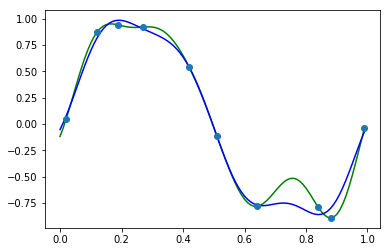

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])

# Define Gaussian distribution as basis function
def phi(x) :
	s = 0.1 # assume (s: the width of Gaussian distribution)
	return np.append(1, np.exp(-(x - np.arange(0, 1 + s, s)) ** 2 / (2 * s * s)))

# Normal Linear Regression
PHI = np.array([phi(x) for x in X])
print("PHI = ")
print(PHI)

omega_normal = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t))
print("omega (normal linear regression) = ")
print(omega_normal)

# Bayesian Linear Regression
alpha = 0.1 # assume
beta = 9.0  # assume
Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mu_N = beta * np.dot(Sigma_N, np.dot(PHI.T, t))
print("mu_N (Bayesian linear regression) = ")
print(mu_N)

def f(omega, x) :
	return np.dot(omega, phi(x))

# Draw the graph
xlist = np.arange(0, 1, 0.01)
normal_lr = [f(omega_normal, x) for x in xlist]
# bayesian_lr = [np.dot(mu_N, phi(x)) for x in xlist]
bayesian_lr = [f(mu_N, x) for x in xlist]

plt.plot(xlist, normal_lr, 'g')
plt.plot(xlist, bayesian_lr, 'b')
plt.plot(X, t, 'o') # => plot the data
plt.show()

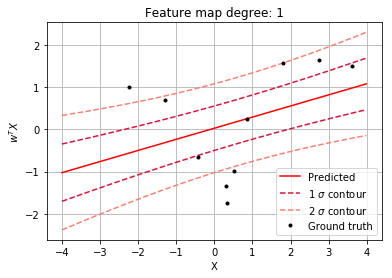

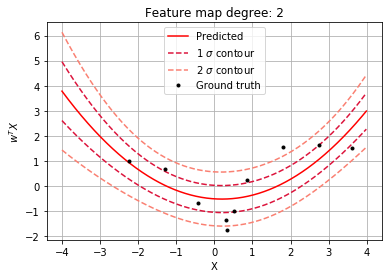

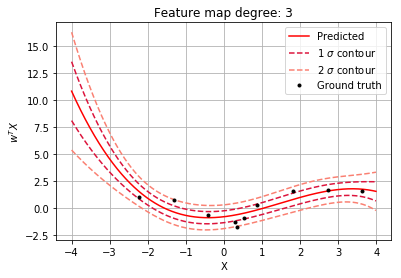

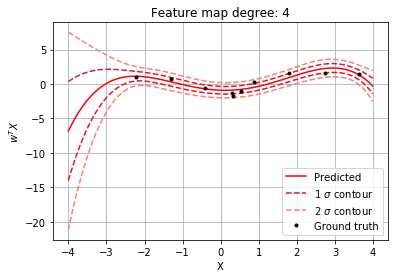

Marginal is:  [8.9063197985237399e-15, 1.2887822124629341e-10, 2.5773978061839385e-10, 1.8947269711109469e-10]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scp
import scipy.stats as scs

def poly(x, d):
    kernel = np.ndarray((x.shape[0], d+1), np.float)
    for i in range(d+1):
        kernel[:, i] = x[:, 0]**(i)
    return np.matrix(kernel)


def BLR(x, y):
    L = 1.0
    B = 4.0

    xTx = x.transpose()*x
    I = np.eye(xTx.shape[0])
    t = np.linalg.inv(xTx + (L/B)*I)

    mu = t*x.transpose()*y
    Sigma = np.linalg.inv(B*xTx + L*I)

    return mu, Sigma


def plotBLR(x, k, mu, Sigma, X, Y):
    B = 4.0
    xs = poly(x, k)
    ystar = np.matrix(xs)*mu
    
    ps = xs*Sigma*xs.transpose()
    ps = np.diag(ps)
    ps = ps.reshape((ps.shape[0], 1))
    ps = ps + (1/B)
    ps = ps**(0.5)

    psigma = ystar + ps
    nsigma = ystar - ps

    ptsigma = psigma + ps
    ntsigma = nsigma - ps

    plt.close() 

    plt.plot(x, ystar, label="Predicted", color="red", linestyle="-")
    plt.plot(x, psigma, color="crimson", linestyle="--")
    plt.plot(x, nsigma, label="1 $\sigma$ contour", color="crimson", linestyle="--")
    plt.plot(x, ptsigma, color="salmon", linestyle="--")
    plt.plot(x, ntsigma, label="2 $\sigma$ contour", color="salmon", linestyle="--")
    plt.plot(X, Y, label="Ground truth", linestyle="", color="black", marker=".")
    plt.title("Feature map degree: "+str(k))
    plt.xlabel("X")
    plt.ylabel("$w^T X$")
    plt.axis()
    plt.legend()
    plt.grid()
    plt.show()

    
X = np.array([[-2.23], [-1.30], [-0.42], [0.30], [0.33], [0.52], [0.87], [1.80], [2.74], [3.62]])
Y = np.array([[1.01], [0.69], [-0.66], [-1.34], [-1.75], [-0.98], [0.25], [1.57], [1.65], [1.51]])
xs = []
mus = []
Sigmas = []
for i in range(4):
    x = poly(X, i+1)
    xs.append(x)
    m, s = BLR(x, Y)
    mus.append(m)
    Sigmas.append(s)
B = 4.0
x = np.arange(-4.0, 4.0, 0.01)
x = x.reshape((x.shape[0], 1))
for i in range(4):
    plt.figure(i+1)
    plotBLR(x, i+1, mus[i], Sigmas[i], X, Y)
#   To calculate marginal
m = np.zeros([Y.shape[0]])
Y = [item for sublist in Y for item in sublist]
marginal = []
for i in range(4):
    x = xs[i]
    c = x*x.transpose() + np.eye(x.shape[0])*(1/B)
    marginal.append(scs.multivariate_normal.pdf(Y, m, c))
print("Marginal is: ", marginal)

# References 

* https://stats.stackexchange.com/questions/252577/bayes-regression-how-is-it-done-in-comparison-to-standard-regression
* https://www.cs.utah.edu/~fletcher/cs6957/lectures/BayesianLinearRegression.pdf